In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('expand_frame_repr', True)
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

## TASK 1

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
def check_df(dataframe, head=8):
  print("##### Shape #####")
  print(dataframe.shape)
  print("\n##### Types #####")
  print(dataframe.dtypes)
  print("\n##### Tail #####")
  print(dataframe.tail(head))
  print("\n##### Head #####")
  print(dataframe.head(head))
  print("\n##### Null Analysis #####")
  print(dataframe.isnull().sum())
  print("\n##### Quantiles #####")
  print(dataframe.describe([0,0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

##### Shape #####
(768, 9)

##### Types #####
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##### Tail #####
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767   

In [6]:
df.columns = [col.upper() for col in df.columns]

## TASK 2

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtype != 'O']

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtype == 'O']

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [9]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [10]:
cat_cols

['OUTCOME']

## TASK 3

In [11]:
def num_summary(dataframe, num_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)
    if plot:
        dataframe[num_col].hist()
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: PREGNANCIES, dtype: float64


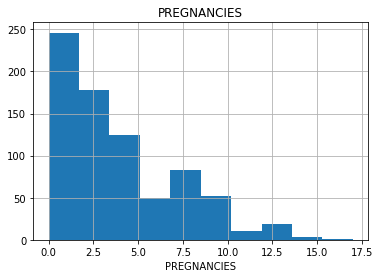

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: GLUCOSE, dtype: float64


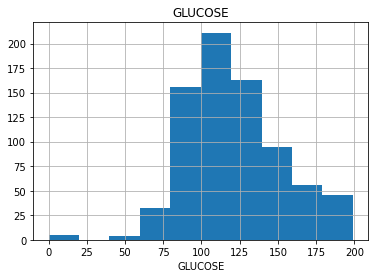

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000000
90%       88.000000
95%       90.000000
99%      106.000000
max      122.000000
Name: BLOODPRESSURE, dtype: float64


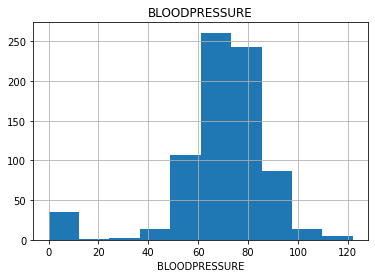

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        8.200000
40%       18.000000
50%       23.000000
60%       27.000000
70%       31.000000
80%       35.000000
90%       40.000000
95%       44.000000
99%       51.330000
max       99.000000
Name: SKINTHICKNESS, dtype: float64


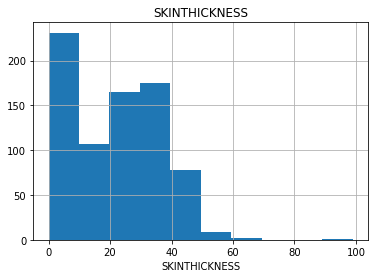

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       30.500000
60%       72.200000
70%      106.000000
80%      150.000000
90%      210.000000
95%      293.000000
99%      519.900000
max      846.000000
Name: INSULIN, dtype: float64


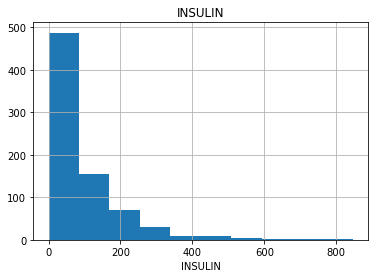

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
5%        21.800000
10%       23.600000
20%       25.900000
30%       28.200000
40%       30.100000
50%       32.000000
60%       33.700000
70%       35.490000
80%       37.800000
90%       41.500000
95%       44.395000
99%       50.759000
max       67.100000
Name: BMI, dtype: float64


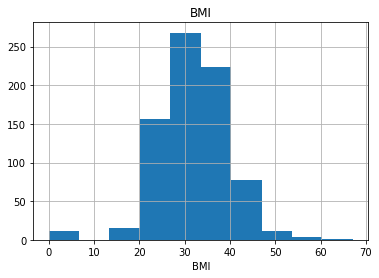

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
5%         0.140350
10%        0.165000
20%        0.219400
30%        0.259000
40%        0.302800
50%        0.372500
60%        0.454200
70%        0.563700
80%        0.687000
90%        0.878600
95%        1.132850
99%        1.698330
max        2.420000
Name: DIABETESPEDIGREEFUNCTION, dtype: float64


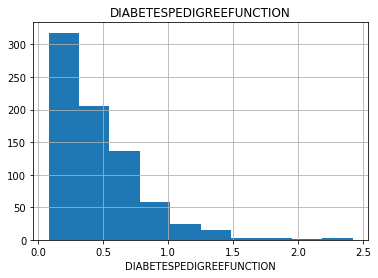

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
5%        21.000000
10%       22.000000
20%       23.000000
30%       25.000000
40%       27.000000
50%       29.000000
60%       33.000000
70%       38.000000
80%       42.600000
90%       51.000000
95%       58.000000
99%       67.000000
max       81.000000
Name: AGE, dtype: float64


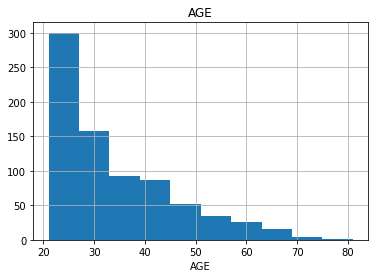

In [12]:
for col in num_cols:
    num_summary(df, col, True)

In [13]:
def cat_summary(dataframe, cat_col, plot=False):
    print(pd.DataFrame({cat_col: dataframe[cat_col].value_counts(),
                        "Ratio": 100 * dataframe[cat_col].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[cat_col], data=dataframe)
        plt.show(block=True)

   OUTCOME      Ratio
0      500  65.104167
1      268  34.895833
##########################################


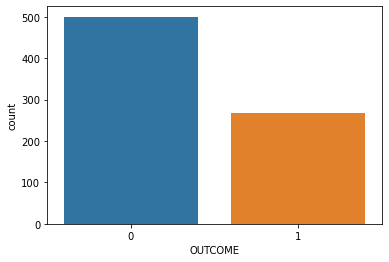

In [14]:
cat_summary(df, 'OUTCOME', plot=True)

## TASK 4

In [15]:
def target_summary_with_cat(dataframe, target, cat_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(cat_col)[target].mean()}), end="\n\n\n")

In [16]:
def target_summary_with_num(dataframe, target, num_col):
    print(dataframe.groupby(target).agg({num_col: "mean"}), end="\n\n\n")

In [17]:
for col in num_cols:
    target_summary_with_num(df, 'OUTCOME', col)

         PREGNANCIES
OUTCOME             
0           3.298000
1           4.865672


            GLUCOSE
OUTCOME            
0        109.980000
1        141.257463


         BLOODPRESSURE
OUTCOME               
0            68.184000
1            70.824627


         SKINTHICKNESS
OUTCOME               
0            19.664000
1            22.164179


            INSULIN
OUTCOME            
0         68.792000
1        100.335821


               BMI
OUTCOME           
0        30.304200
1        35.142537


         DIABETESPEDIGREEFUNCTION
OUTCOME                          
0                        0.429734
1                        0.550500


               AGE
OUTCOME           
0        31.190000
1        37.067164




## TASK 5

In [18]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [20]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe,col_name)
    outlier_df = dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)]

    if outlier_df.shape[0] > 10:
        print(outlier_df.head())
    else:
        print(outlier_df)

    if index:
        return outlier_df.index

In [21]:
for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES True
GLUCOSE True
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


In [22]:
for col in num_cols:
    print(col, outlier_thresholds(df, col))

PREGNANCIES (-6.5, 13.5)
GLUCOSE (37.125, 202.125)
BLOODPRESSURE (35.0, 107.0)
SKINTHICKNESS (-48.0, 80.0)
INSULIN (-190.875, 318.125)
BMI (13.35, 50.550000000000004)
DIABETESPEDIGREEFUNCTION (-0.32999999999999996, 1.2)
AGE (-1.5, 66.5)


In [23]:
for col in num_cols:
    print(f'\n#####{col}#####')
    print(grab_outliers(df, col))


#####PREGNANCIES#####
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
None

#####GLUCOSE#####
     PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32 

## TASK 6

In [24]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end='\n')

    if na_name:
        return na_columns

In [25]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains('_NA_')].columns
    for col in na_flags:
        print(pd.DataFrame({'TARGET_MEAN': temp_df.groupby(col)[target].mean(),
                            'Count': temp_df.groupby(col)[target].count()}), end='\n\n\n')

In [26]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


## TASK 7

In [27]:
corr = df[num_cols].corr() 
corr

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE
PREGNANCIES,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
GLUCOSE,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BLOODPRESSURE,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SKINTHICKNESS,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
INSULIN,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DIABETESPEDIGREEFUNCTION,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
AGE,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [28]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

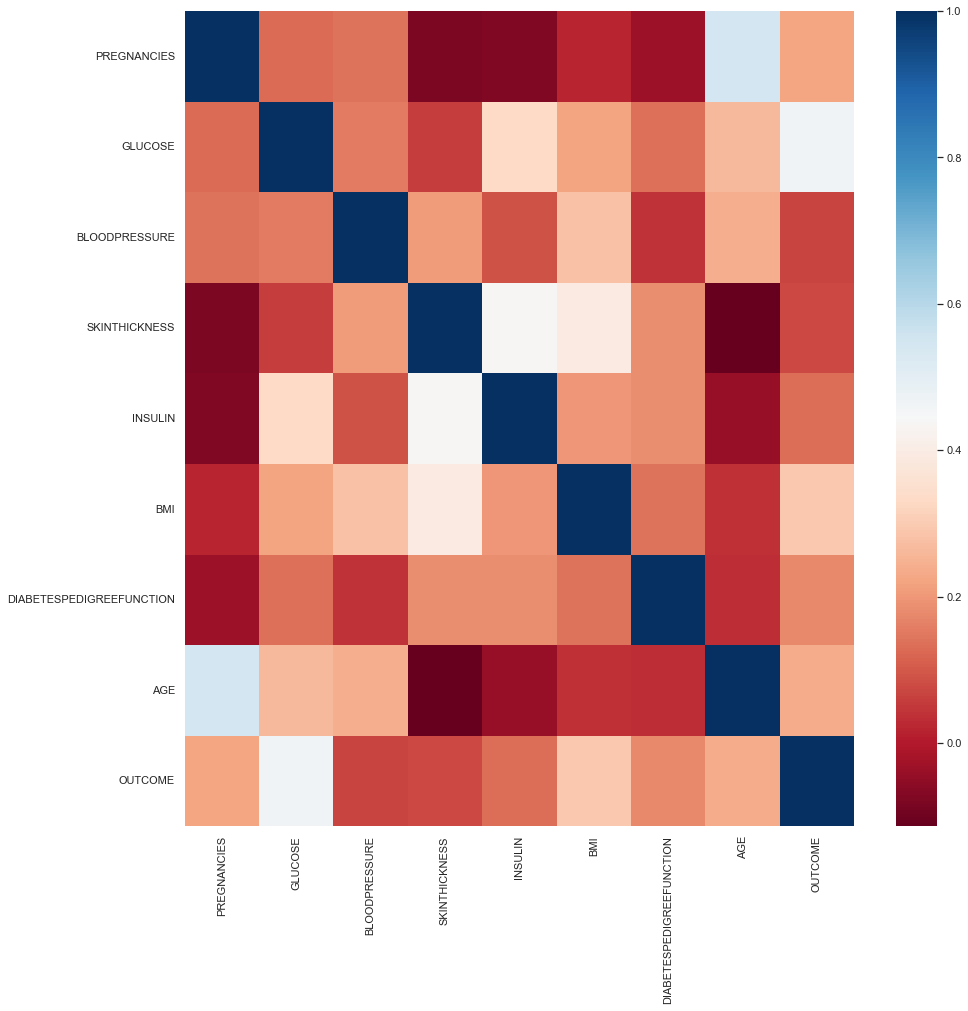

[]

In [29]:
high_correlated_cols(df, True)

## TASK 8

In [30]:
df.skew(skipna=True)

PREGNANCIES                 0.901674
GLUCOSE                     0.173754
BLOODPRESSURE              -1.843608
SKINTHICKNESS               0.109372
INSULIN                     2.272251
BMI                        -0.428982
DIABETESPEDIGREEFUNCTION    1.919911
AGE                         1.129597
OUTCOME                     0.635017
dtype: float64

In [43]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [44]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

In [45]:
zero_to_nan_cols = ['GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI']

In [46]:
for col in zero_to_nan_cols:
    df[col] = df[col].replace({'0':np.nan, 0:np.nan})
    

In [47]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [48]:
missing_vs_target(df, 'OUTCOME', zero_to_nan_cols)

                 TARGET_MEAN  Count
GLUCOSE_NA_FLAG                    
0                   0.348958    768


                       TARGET_MEAN  Count
BLOODPRESSURE_NA_FLAG                    
0                         0.348958    768


                       TARGET_MEAN  Count
SKINTHICKNESS_NA_FLAG                    
0                         0.348958    768


                 TARGET_MEAN  Count
INSULIN_NA_FLAG                    
0                   0.348958    768


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.348958    768




In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREGNANCIES               768 non-null    float64
 1   GLUCOSE                   768 non-null    float64
 2   BLOODPRESSURE             768 non-null    float64
 3   SKINTHICKNESS             768 non-null    float64
 4   INSULIN                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DIABETESPEDIGREEFUNCTION  768 non-null    float64
 7   AGE                       768 non-null    float64
 8   OUTCOME                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [50]:
def replace_with_thresholds(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name)

    dataframe.loc[dataframe[col_name] > up, col_name] = up
    dataframe.loc[dataframe[col_name] < low, col_name] = low

In [51]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [52]:
for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


In [53]:
clf = LocalOutlierFactor(n_neighbors=20)

In [54]:
clf.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

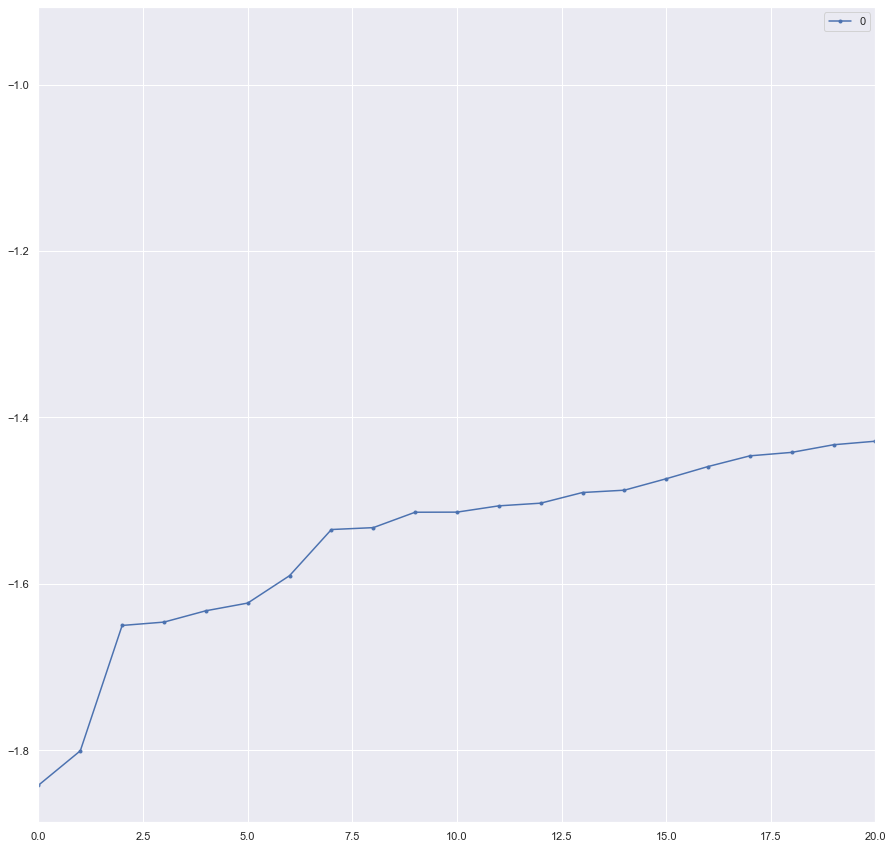

In [55]:
df_scores = clf.negative_outlier_factor_
sorted_df_scores = np.sort(df_scores)
scores = pd.DataFrame(sorted_df_scores)
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [56]:
scores.head(20)

,0
0,-1.841836
1,-1.800494
2,-1.649855
3,-1.645828
4,-1.632223
5,-1.622978
6,-1.590061
7,-1.534604
8,-1.532342
9,-1.513833


In [57]:
th = sorted_df_scores[7]
th

-1.5346044397866696

In [58]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
PREGNANCIES,768.0,3.837240,3.344157,0.000,0.00000,0.00000,3.000000,6.00000,9.0000,13.0000,13.50
GLUCOSE,768.0,121.686763,30.435949,44.000,67.67000,80.00000,117.000000,140.25000,167.0000,196.0000,199.00
BLOODPRESSURE,768.0,72.375171,11.696835,40.000,44.00000,52.00000,72.187585,80.00000,88.0000,104.0000,104.00
SKINTHICKNESS,768.0,28.884020,7.442716,14.500,14.50000,14.67500,29.059150,32.00000,40.0000,42.5000,42.50
INSULIN,768.0,138.552083,31.001586,84.000,84.00000,84.00000,146.500000,146.50000,184.0000,184.0000,184.00
BMI,768.0,32.394716,6.667462,18.200,19.50000,22.23500,32.394716,36.60000,41.5000,50.0825,50.25
DIABETESPEDIGREEFUNCTION,768.0,0.458914,0.285596,0.078,0.09468,0.14035,0.372500,0.62625,0.8786,1.2000,1.20
AGE,768.0,33.199870,11.628404,21.000,21.00000,21.00000,29.000000,41.00000,51.0000,66.5000,66.50
OUTCOME,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.000000,1.00000,1.0000,1.0000,1.00


In [59]:
df[df_scores < th].shape

(7, 9)

In [60]:
df[df_scores < th].index

Int64Index([62, 125, 483, 537, 576, 672, 680], dtype='int64')

In [61]:
df.drop(axis=0, labels=df[df_scores < th].index, inplace=True)

## TASK 9

In [63]:
df['NEW_PREGNANCY3ORMORE_FLAG'] = df['PREGNANCIES'].apply(lambda x: 1 if x > 2 else 0)

In [64]:
df.groupby('NEW_PREGNANCY3ORMORE_FLAG').agg({'OUTCOME': 'mean'})

,OUTCOME
NEW_PREGNANCY3ORMORE_FLAG,
0,0.246377
1,0.437500


In [65]:
df[['PREGNANCIES', 'NEW_PREGNANCY3ORMORE_FLAG']].head()

,PREGNANCIES,NEW_PREGNANCY3ORMORE_FLAG
0,6.0,1
1,1.0,0
2,8.0,1
3,1.0,0
4,0.0,0


In [66]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count=[df.loc[df["NEW_PREGNANCY3ORMORE_FLAG"] == 1, "OUTCOME"].sum(),
                                             df.loc[df["NEW_PREGNANCY3ORMORE_FLAG"] == 0, "OUTCOME"].sum()],

                                      nobs=[df.loc[df["NEW_PREGNANCY3ORMORE_FLAG"] == 1, "OUTCOME"].shape[0],
                                            df.loc[df["NEW_PREGNANCY3ORMORE_FLAG"] == 0, "OUTCOME"].shape[0]])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 5.4997, p-value = 0.0000


In [67]:
df.loc[df['AGE'] <= 29, 'NEW_AGE_CAT'] = 'young'

df.loc[df['AGE'] > 29 & (df['AGE'] < 41), 'NEW_AGE_CAT'] = 'mature'

df.loc[df['AGE'] >= 41, 'NEW_AGE_CAT'] = 'senior'

In [68]:
df.loc[(df['NEW_PREGNANCY3ORMORE_FLAG'] == 0) & (df['AGE'] <= 29), 'NEW_AGE_PREG'] = 'lesspregyoung'

df.loc[(df['NEW_PREGNANCY3ORMORE_FLAG'] == 0) & (df['AGE'] > 29) & (df['AGE'] < 41), 'NEW_AGE_PREG'] = 'lesspregmature'

df.loc[(df['NEW_PREGNANCY3ORMORE_FLAG'] == 0) & (df['AGE'] >= 41), 'NEW_AGE_PREG'] = 'lesspregsenior'

df.loc[(df['NEW_PREGNANCY3ORMORE_FLAG'] == 1) & (df['AGE'] <= 29), 'NEW_AGE_PREG'] = 'morepregyoung'

df.loc[(df['NEW_PREGNANCY3ORMORE_FLAG'] == 1) & (df['AGE'] > 29) & (df['AGE'] < 41), 'NEW_AGE_PREG'] = 'morepregmature'

df.loc[(df['NEW_PREGNANCY3ORMORE_FLAG'] == 1) & (df['AGE'] >= 41), 'NEW_AGE_PREG'] = 'morepregsenior'

In [69]:
df.loc[(17 <= df['BMI']) & ( df['BMI'] < 18.5 ), 'NEW_BMI_CAT'] = 'underweight'

df.loc[(18.5 <= df['BMI']) & ( df['BMI'] < 25), 'NEW_BMI_CAT'] = 'normal'

df.loc[(25 <= df['BMI']) & ( df['BMI']  < 30), 'NEW_BMI_CAT'] = 'overweight'

df.loc[(30 <= df['BMI']) & ( df['BMI'] < 35), 'NEW_BMI_CAT'] = 'obeseI'

df.loc[(35 <= df['BMI']) & ( df['BMI'] < 40), 'NEW_BMI_CAT'] = 'obeseII'

df.loc[(40 <= df['BMI']), 'NEW_BMI_CAT'] = 'obeseIII'

In [70]:
df.loc[(0 <= df['GLUCOSE']) & (df['GLUCOSE'] < 100 ), 'NEW_GLUCOSE_CAT'] = 'lowglucose'

df.loc[(100 <= df['GLUCOSE']) & (df['GLUCOSE'] < 140 ), 'NEW_GLUCOSE_CAT'] = 'normalglucose'

df.loc[(140 <= df['GLUCOSE']) & (df['GLUCOSE'] < 200 ), 'NEW_GLUCOSE_CAT'] = 'highglucose'

df.loc[(200 <= df['GLUCOSE']), 'NEW_GLUCOSE_CAT'] = 'toohighglucose'

In [71]:
df['NEW_AGE_BMI'] = df['AGE'] * df['BMI']

In [72]:
df['NEW_BMI_INSULIN'] = df['BMI'] * df['INSULIN']

In [73]:
df.loc[(80 > df['BLOODPRESSURE']), 'NEW_BLOODPRESSURE_CAT'] = 'normalbloodpressure'

df.loc[(80 <= df['BLOODPRESSURE']) & (90 > df['BLOODPRESSURE']), 'NEW_BLOODPRESSURE_CAT'] = 'elevatedbloodpressure'

df.loc[ (90 < df['BLOODPRESSURE']), 'NEW_BLOODPRESSURE_CAT'] = 'highbloodpressure'

In [74]:
df['NEW_AGE_BLOODPRESSURE'] = df['AGE'] * df['BLOODPRESSURE']

In [75]:
df.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME',
       'NEW_PREGNANCY3ORMORE_FLAG', 'NEW_AGE_CAT', 'NEW_AGE_PREG',
       'NEW_BMI_CAT', 'NEW_GLUCOSE_CAT', 'NEW_AGE_BMI', 'NEW_BMI_INSULIN',
       'NEW_BLOODPRESSURE_CAT', 'NEW_AGE_BLOODPRESSURE'],
      dtype='object')

In [76]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 761
Variables: 18
cat_cols: 7
num_cols: 11
cat_but_car: 0
num_but_cat: 2


## TASK 10

In [77]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [78]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
binary_cols

['OUTCOME', 'NEW_PREGNANCY3ORMORE_FLAG', 'NEW_AGE_CAT']

In [79]:
for col in binary_cols:
    label_encoder(df, col)

In [80]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_PREGNANCY3ORMORE_FLAG,NEW_AGE_CAT,NEW_AGE_PREG,NEW_BMI_CAT,NEW_GLUCOSE_CAT,NEW_AGE_BMI,NEW_BMI_INSULIN,NEW_BLOODPRESSURE_CAT,NEW_AGE_BLOODPRESSURE
0,6.0,148.0,72.0,35.00000,146.5,33.6,0.627,50.0,1,1,1,morepregsenior,obeseI,highglucose,1680.0,4922.40,normalbloodpressure,3600.0
1,1.0,85.0,66.0,29.00000,146.5,26.6,0.351,31.0,0,0,0,lesspregmature,overweight,lowglucose,824.6,3896.90,normalbloodpressure,2046.0
2,8.0,183.0,64.0,29.05915,146.5,23.3,0.672,32.0,1,1,0,morepregmature,normal,highglucose,745.6,3413.45,normalbloodpressure,2048.0
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0,0,0,lesspregyoung,overweight,lowglucose,590.1,2641.40,normalbloodpressure,1386.0
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1,0,0,lesspregmature,obeseIII,normalglucose,1422.3,7240.80,normalbloodpressure,1320.0


In [81]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [82]:
rare_analyser(df, "OUTCOME", cat_cols)

NEW_AGE_CAT : 2
   COUNT   RATIO  TARGET_MEAN
0    569  0.7477     0.289982
1    192  0.2523     0.531250


NEW_AGE_PREG : 6
                COUNT     RATIO  TARGET_MEAN
lesspregmature     36  0.047306     0.583333
lesspregsenior     33  0.043364     0.484848
lesspregyoung     276  0.362681     0.173913
morepregmature    140  0.183968     0.435714
morepregsenior    159  0.208936     0.540881
morepregyoung     117  0.153745     0.299145


NEW_BMI_CAT : 6
             COUNT     RATIO  TARGET_MEAN
normal          99  0.130092     0.070707
obeseI         235  0.308804     0.438298
obeseII        148  0.194481     0.425676
obeseIII        97  0.127464     0.556701
overweight     178  0.233903     0.224719
underweight      4  0.005256     0.000000


NEW_GLUCOSE_CAT : 3
               COUNT     RATIO  TARGET_MEAN
highglucose      197  0.258870     0.685279
lowglucose       186  0.244415     0.069892
normalglucose    378  0.496715     0.314815


NEW_BLOODPRESSURE_CAT : 3
                      

In [83]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [84]:
df = rare_encoder(df, 0.01)

In [85]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [86]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [87]:
ohe_cols

['NEW_AGE_PREG', 'NEW_BMI_CAT', 'NEW_GLUCOSE_CAT', 'NEW_BLOODPRESSURE_CAT']

In [88]:
df = one_hot_encoder(df, ohe_cols)

In [89]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_PREGNANCY3ORMORE_FLAG,...,NEW_AGE_PREG_morepregyoung,NEW_BMI_CAT_normal,NEW_BMI_CAT_obeseI,NEW_BMI_CAT_obeseII,NEW_BMI_CAT_obeseIII,NEW_BMI_CAT_overweight,NEW_GLUCOSE_CAT_lowglucose,NEW_GLUCOSE_CAT_normalglucose,NEW_BLOODPRESSURE_CAT_highbloodpressure,NEW_BLOODPRESSURE_CAT_normalbloodpressure
0,6.0,148.0,72.0,35.00000,146.5,33.6,0.627,50.0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.00000,146.5,26.6,0.351,31.0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,8.0,183.0,64.0,29.05915,146.5,23.3,0.672,32.0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21.0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0.0,137.0,40.0,35.00000,168.0,43.1,1.200,33.0,1,0,...,0,0,0,0,1,0,0,1,0,1


## TASK 11

In [90]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [91]:
df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,NEW_AGE_BMI,NEW_BMI_INSULIN,NEW_AGE_BLOODPRESSURE
0,0.646280,0.858607,-0.039164,0.821324,0.250177,0.180286,0.588962,1.452885,1.384614,0.261018,1.079753
1,-0.850431,-1.233328,-0.558801,0.015563,0.250177,-0.875885,-0.376097,-0.187282,-0.583586,-0.426816,-0.377363
2,1.244964,2.020793,-0.732013,0.023507,0.250177,-1.373795,0.746308,-0.100958,-0.765358,-0.751081,-0.375487
3,-0.850431,-1.100507,-0.558801,-0.790198,-1.445795,-0.649563,-1.019470,-1.050528,-1.123149,-1.268919,-0.996215
4,-1.149773,0.493348,-2.810560,0.821324,0.944719,1.613662,2.592508,-0.014633,0.791669,1.816040,-1.058100


In [127]:
df.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME',
       'NEW_PREGNANCY3ORMORE_FLAG', 'NEW_AGE_CAT', 'NEW_AGE_BMI',
       'NEW_BMI_INSULIN', 'NEW_AGE_BLOODPRESSURE',
       'NEW_AGE_PREG_lesspregsenior', 'NEW_AGE_PREG_lesspregyoung',
       'NEW_AGE_PREG_morepregmature', 'NEW_AGE_PREG_morepregsenior',
       'NEW_AGE_PREG_morepregyoung', 'NEW_BMI_CAT_normal',
       'NEW_BMI_CAT_obeseI', 'NEW_BMI_CAT_obeseII', 'NEW_BMI_CAT_obeseIII',
       'NEW_BMI_CAT_overweight', 'NEW_GLUCOSE_CAT_lowglucose',
       'NEW_GLUCOSE_CAT_normalglucose',
       'NEW_BLOODPRESSURE_CAT_highbloodpressure',
       'NEW_BLOODPRESSURE_CAT_normalbloodpressure'],
      dtype='object')

## TASK 12

In [128]:
y = df["OUTCOME"]
X = df.drop('OUTCOME', axis=1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [130]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

In [131]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7467248908296943

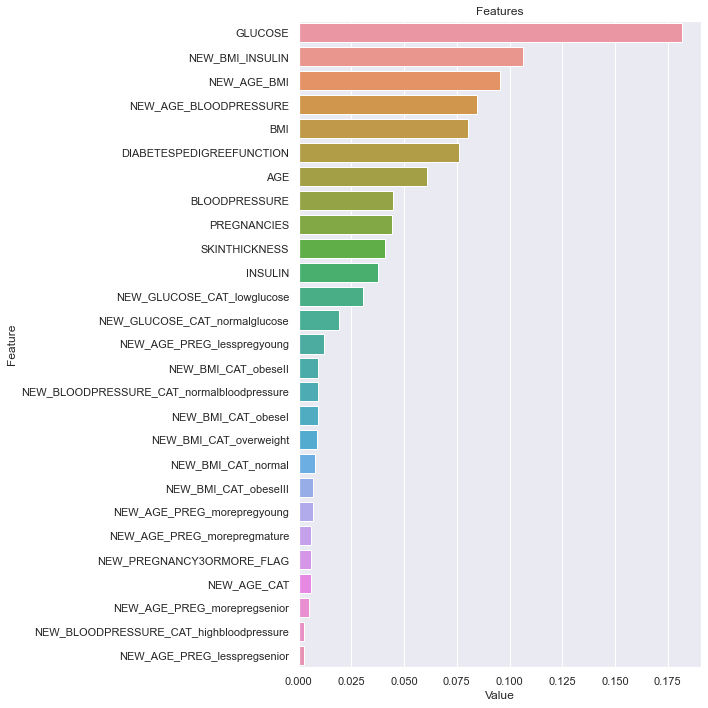

In [132]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importance.png")
plot_importance(rf_model, X_train)

## What would happen if we built a machine learning model directly?

In [133]:
dff = pd.read_csv('diabetes.csv')
dff.columns = [col.upper() for col in dff.columns]

In [134]:
zero_to_nan_cols = ['GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI']

In [135]:
for col in zero_to_nan_cols:
    dff[col] = dff[col].replace({'0':np.nan, 0:np.nan})

In [136]:
dff.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [137]:
dff.dropna(inplace=True)

In [138]:
y = dff["OUTCOME"]
X = dff.drop(['OUTCOME'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7542372881355932